In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

[list comprehension](https://www.w3schools.com/python/python_lists_comprehension.asp)

In [4]:
# read the data
input_dir = "/Users/arama1/Desktop/Accelerator/Data/Output/Reddit"

all_files = pd.concat([
    pd.read_csv(os.path.join(input_dir, file))
    for file in os.listdir(input_dir)
    if file.endswith('.csv')
])

# equivalent
# csv_files = []
# for file in os.listdir(input_dir):
#     if file.endswith('.csv'):
#         file_path = os.path.join(input_dir, file)
#         df = pd.read_csv(file_path)
#         csv_files.append(df)
# all_files = pd.concat(csv_files)

# save the data
#all_files.to_csv('/Users/junheyang/Desktop/working_docs/Accelerator/data/Output/Reddit/all_files.csv', index=False)


In [5]:
all_files.head()

,id_submission,name,created_utc_submission,title,selftext,subreddit_submission,author_submission,id_comment,subreddit_comment,created_utc_comment,body,link_id,parent_id,author_comment
0,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr1n0gz,truechildfree,2015-05-07 18:13:18,You can do it! Just please make sure to take y...,t3_3574mw,t3_3574mw,StinkybuttMcPoopface
1,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr21ui2,truechildfree,2015-05-08 00:57:56,"Awesome, I'm a bit jealous!",t3_3574mw,t3_3574mw,WonTwoThree
2,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr21vda,truechildfree,2015-05-08 00:58:40,"Curious, OP said they would be under for the p...",t3_3574mw,t1_cr1n0gz,WonTwoThree
3,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr2bxcr,truechildfree,2015-05-08 07:26:37,Oh I didn't see that. It's not typically recom...,t3_3574mw,t1_cr21vda,StinkybuttMcPoopface
4,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr31czo,truechildfree,2015-05-08 22:45:50,Yeeeeaaaah that's terrifying. Sounds like goin...,t3_3574mw,t1_cr2bxcr,WonTwoThree


In [6]:
# how many unique submission are there?
all_files.groupby(['subreddit_submission'])['id_submission'].nunique()


subreddit_submission
AskDocs             38
AskWomenOver30      20
Parenting           20
Supplements          1
birthcontrol       280
childfree         2587
healthcare           6
hysterectomy        33
medicine             7
truechildfree       54
Name: id_submission, dtype: int64

Is unique user ever a question? Does Reddit allow multiple entries for the same user?

In [7]:
# Convert the timestamp column to datetime
all_files['created_utc_comment'] = pd.to_datetime(all_files['created_utc_comment'])
all_files['created_utc_submission'] = pd.to_datetime(all_files['created_utc_submission'])

In [8]:
print("Earliest comment:", all_files['created_utc_comment'].min())

print("Latest comment:", all_files['created_utc_comment'].max())

Earliest comment: 2010-04-19 21:55:34
Latest comment: 2022-12-30 14:44:32


In [9]:
# Group by subreddit and show date ranges
for subreddit in all_files['subreddit_submission'].unique():
    subreddit_data = all_files[all_files['subreddit_submission'] == subreddit]
    print(f"\nSubreddit: {subreddit}")
    print("Earliest submission:", subreddit_data['created_utc_submission'].min())
    print("Latest submission:", subreddit_data['created_utc_submission'].max())


Subreddit: truechildfree
Earliest submission: 2014-03-14 14:54:48
Latest submission: 2022-09-25 19:26:32

Subreddit: nan
Earliest submission: NaT
Latest submission: NaT

Subreddit: hysterectomy
Earliest submission: 2019-01-17 14:21:32
Latest submission: 2022-11-22 14:21:01

Subreddit: childfree
Earliest submission: 2010-08-04 17:15:16
Latest submission: 2022-12-29 22:15:41

Subreddit: healthcare
Earliest submission: 2016-01-25 10:12:26
Latest submission: 2021-03-25 18:40:35

Subreddit: Supplements
Earliest submission: 2021-12-26 18:11:36
Latest submission: 2021-12-26 18:11:36

Subreddit: AskWomenOver30
Earliest submission: 2014-01-03 20:32:38
Latest submission: 2022-09-02 16:31:12

Subreddit: medicine
Earliest submission: 2014-11-21 18:22:14
Latest submission: 2022-10-28 16:05:02

Subreddit: birthcontrol
Earliest submission: 2011-07-28 23:16:46
Latest submission: 2022-12-25 22:39:23

Subreddit: AskDocs
Earliest submission: 2014-05-25 20:39:55
Latest submission: 2022-12-23 22:52:19

Su

plot this?

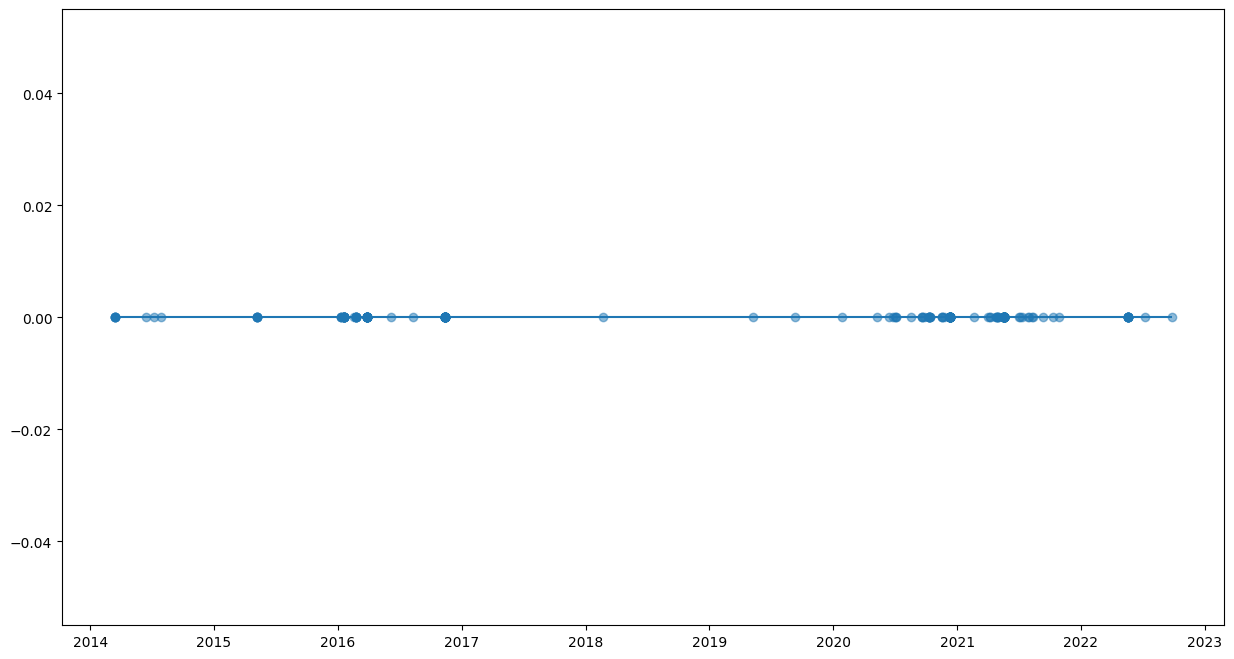

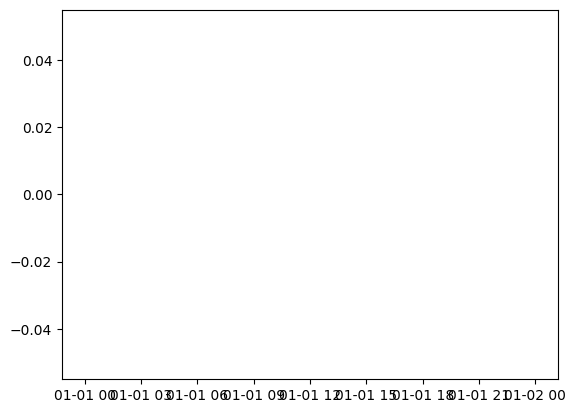

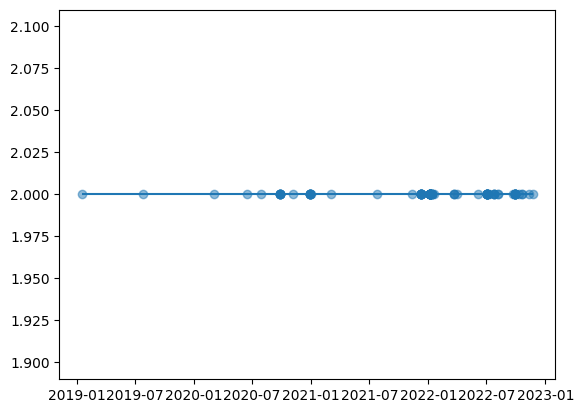

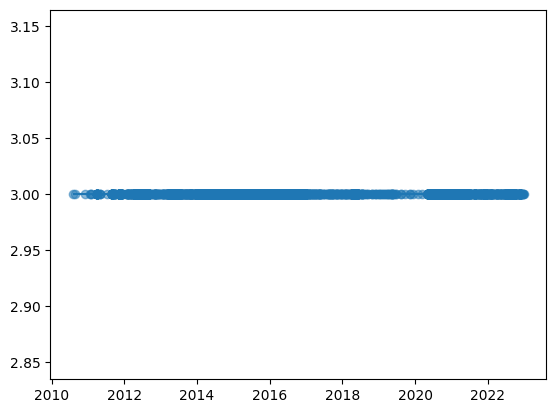

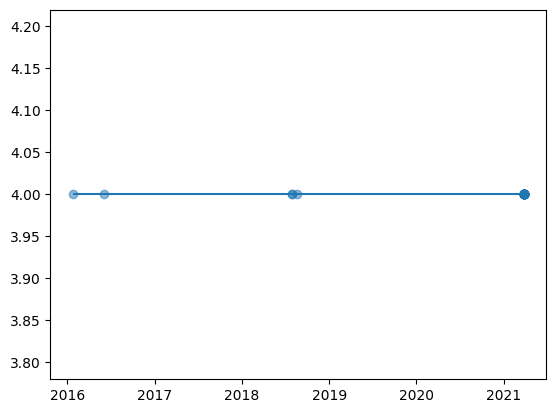

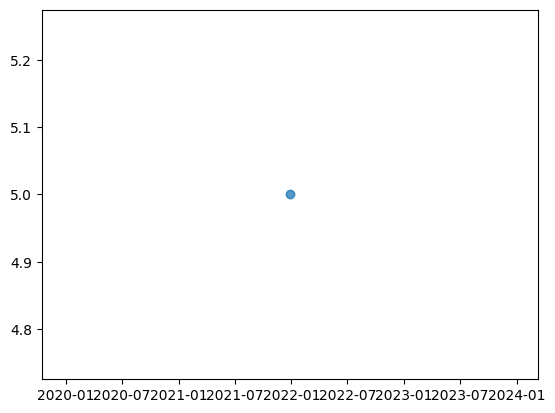

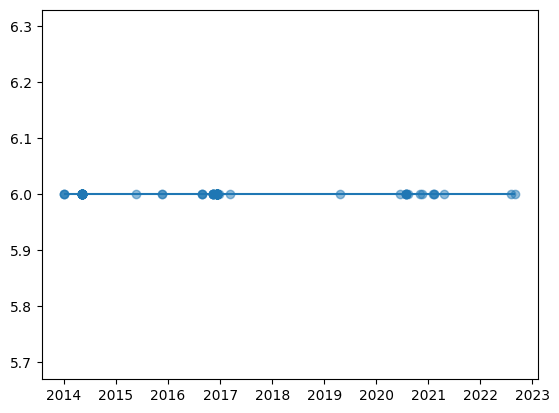

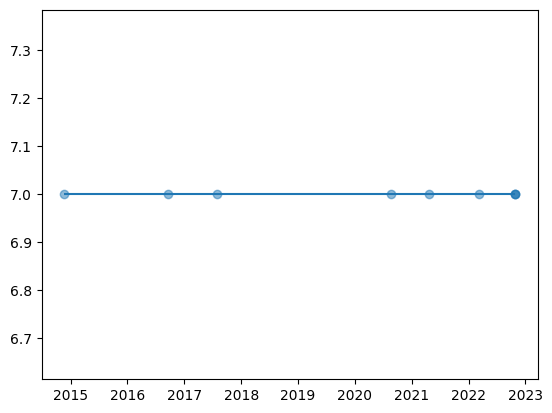

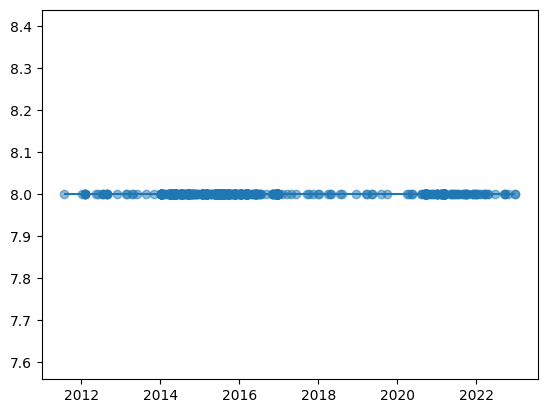

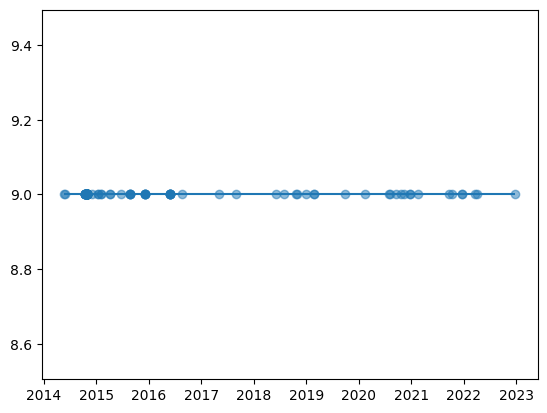

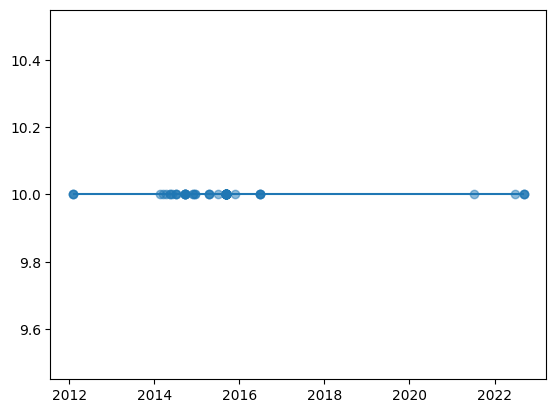

In [10]:
# Create figure with larger size
plt.figure(figsize=(15,8))

# Get unique subreddits
subreddits = all_files['subreddit_submission'].unique()

# Create timeine for each subreddit
for i, subreddit in enumerate(subreddits):
    subreddit_data = all_files[all_files['subreddit_submission'] == subreddit]
    
    # Get min and max dates
    min_date = subreddit_data['created_utc_submission'].min()
    max_date = subreddit_data['created_utc_submission'].max()

    # Plot horizontal line for the date range
    plt.hlines(y=i, xmin=min_date, xmax=max_date, label=subreddit)

    # Add points for individual submissions
    plt.scatter(subreddit_data['created_utc_submission'], [i] *len(subreddit_data),
                alpha=0.5, label=f"Posts in r/{subreddit}")
    
    #Customize the plot

    #show the plot
    plt.show()


                

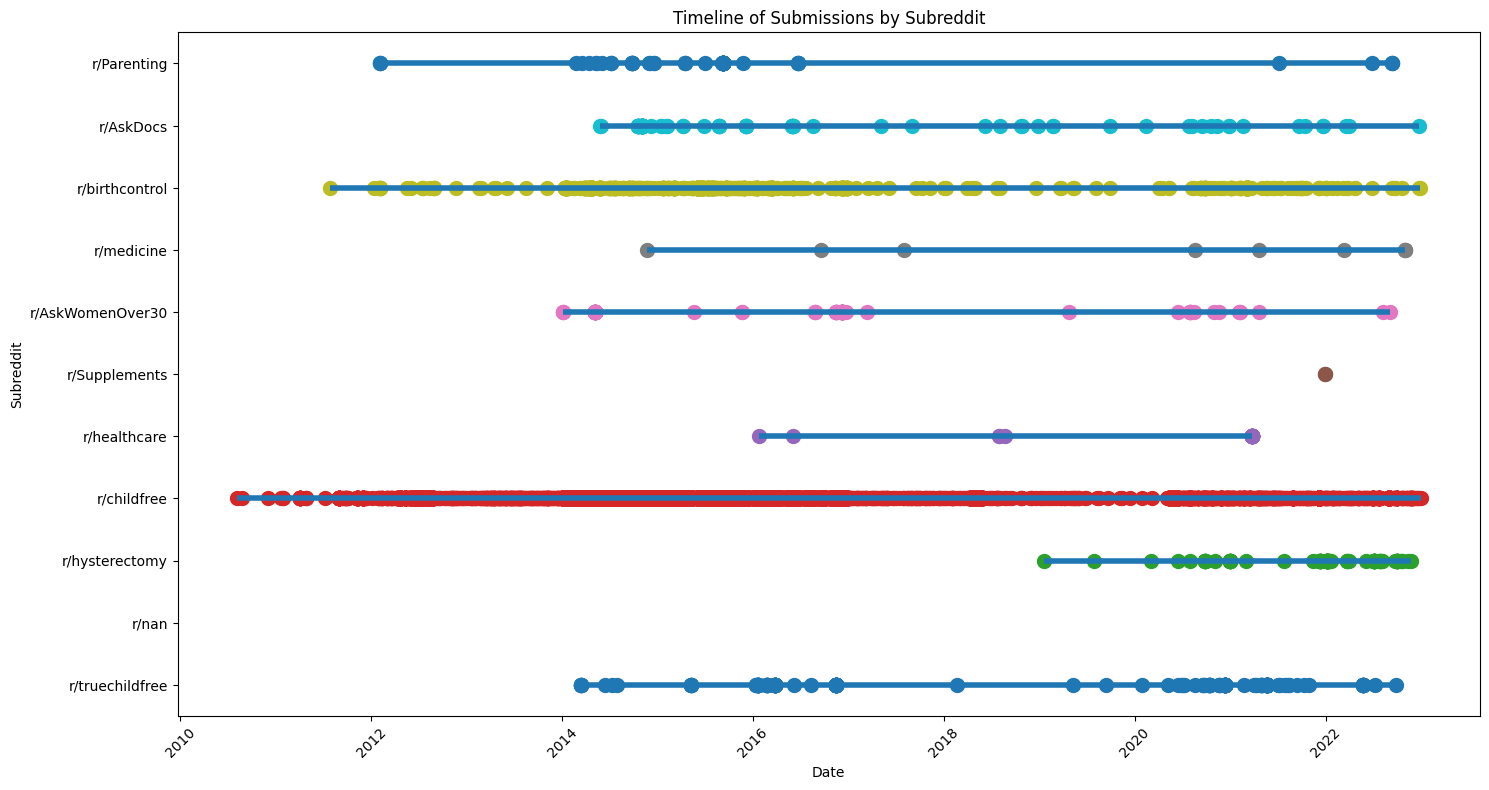

In [15]:
# Create figure with larger size
plt.figure(figsize=(15, 8))
# Get unique subreddits
subreddits = all_files['subreddit_submission'].unique()
# Create timeline for each subreddit
for i, subreddit in enumerate(subreddits):
    subreddit_data = all_files[all_files["subreddit_submission"] == subreddit]
    # Get min and max dates
    min_date = subreddit_data['created_utc_submission'].min()
    max_date = subreddit_data['created_utc_submission'].max()
    
    # Plot horizontal line for the date range
    plt.hlines(y=i, xmin=min_date, xmax=max_date, linewidth=4)
    # Add points for individual submissions
    plt.scatter(subreddit_data['created_utc_submission'], [i] * len(subreddit_data), s=100,
               alpha=1, label=f"Posts in r/{subreddit}")
# Customize the plot
plt.yticks(range(len(subreddits)), [f"r/{s}" for s in subreddits])
plt.xlabel('Date')
plt.ylabel('Subreddit')
plt.title('Timeline of Submissions by Subreddit')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Adjust layout to prevent label cutoff
plt.tight_layout()
# Show the plot
plt.show()

In [19]:
#Separate data r/childfree and r/birthcontrol into a subset
subsetCFBC_data = all_files[(all_files['subreddit_submission'] == 'childfree') | (all_files['subreddit_submission'] == 'birthcontrol')]

subsetCFBC_data.head(5)

,id_submission,name,created_utc_submission,title,selftext,subreddit_submission,author_submission,id_comment,subreddit_comment,created_utc_comment,body,link_id,parent_id,author_comment
0,cxcnk,NaN,2010-08-04 17:15:16,"/r/Childfree women, I'd like some advice about...",I always imagined that it would be fairly easy...,childfree,[deleted],NaN,NaN,NaT,NaN,NaN,NaN,NaN
1,d4g73,NaN,2010-08-23 15:37:18,My Essure (permanent sterilization) Experience...,I'm 27 and live in Southern California. \n\nIf...,childfree,valentinedoux,NaN,NaN,NaT,NaN,NaN,NaN,NaN
2,efvn3,NaN,2010-12-03 23:32:11,"Follow-up on ""My Essure Experience"" - HSG exam...","[My original post: ""My Essure Experience from ...",childfree,valentinedoux,NaN,NaN,NaT,NaN,NaN,NaN,NaN
3,ghkap,t3_ghkap,2011-04-03 09:17:43,Have Any Nickel Allergies At All? Before You G...,If you are sensitive to cheap jewelry or have ...,childfree,newlook,c1nl2f2,childfree,2011-04-03 10:38:23,"Absolutely. I wanted Essure initially, and the...",t3_ghkap,t3_ghkap,[deleted]
4,ghkap,t3_ghkap,2011-04-03 09:17:43,Have Any Nickel Allergies At All? Before You G...,If you are sensitive to cheap jewelry or have ...,childfree,newlook,c1nl7su,childfree,2011-04-03 12:13:13,Thanks for the info - I can't wear any sort of...,t3_ghkap,t3_ghkap,SendInTheNinjas


/var/folders/lz/3dhhqmvn2ksf1gl3c61trx4r0000gn/T/ipykernel_71218/720589892.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetCFBC_data['created_utc_submission'] = pd.to_datetime(subsetCFBC_data['created_utc_submission'])
/var/folders/lz/3dhhqmvn2ksf1gl3c61trx4r0000gn/T/ipykernel_71218/720589892.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subsetCFBC_data['year'] = subsetCFBC_data['created_utc_submission'].dt.year


<Figure size 1000x600 with 0 Axes>

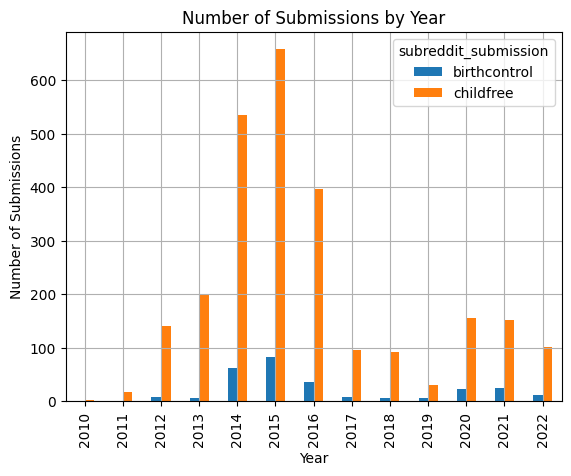

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming subsetCFBC_data is already defined and has a 'submission_time' column
# Convert 'submission_time' to datetime if it's not already
subsetCFBC_data['created_utc_submission'] = pd.to_datetime(subsetCFBC_data['created_utc_submission'])

# Extract the year from 'submission_time'
subsetCFBC_data['year'] = subsetCFBC_data['created_utc_submission'].dt.year

# Group by year and count the number of submissions
submission_counts_by_year = subsetCFBC_data.groupby(['year', 'subreddit_submission'])['id_submission'].nunique().unstack()

# Plot the results
plt.figure(figsize=(10, 6))
submission_counts_by_year.plot(kind='bar')
plt.xlabel('Year')
plt.ylabel('Number of Submissions')
plt.title('Number of Submissions by Year')
plt.grid(True)
plt.show()

In [23]:
print(subsetCFBC_data.columns)

Index(['id_submission', 'name', 'created_utc_submission', 'title', 'selftext',
       'subreddit_submission', 'author_submission', 'id_comment',
       'subreddit_comment', 'created_utc_comment', 'body', 'link_id',
       'parent_id', 'author_comment', 'year'],
      dtype='object')


How to handle NAs?

In [26]:
# average length of comment body
# Calculate average length of comment body
all_files['body_length'] = all_files['body'].str.len()
average_length = all_files['body_length'].mean()
print(f"Average comment length: {average_length:.2f} characters")

# If you want to see the distribution
print("\nComment length statistics:")
print(all_files['body_length'].describe())

Average comment length: 373.58 characters

Comment length statistics:
count    18907.000000
mean       373.584069
std        582.021309
min          1.000000
25%         97.000000
50%        215.000000
75%        438.500000
max      10066.000000
Name: body_length, dtype: float64


<Figure size 1000x600 with 0 Axes>

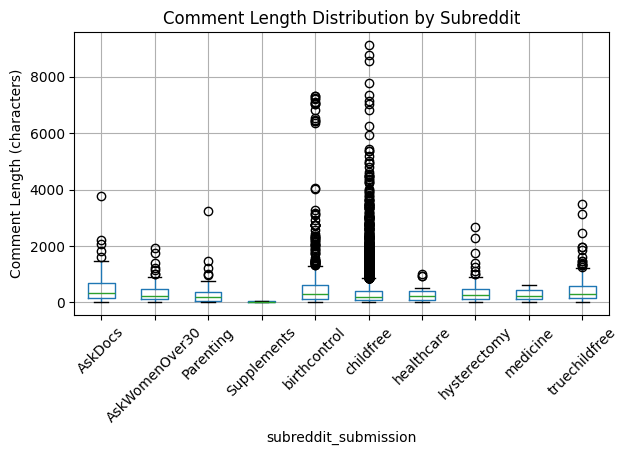

In [27]:
# Calculate comment length statistics by subreddit
subreddit_stats = all_files.groupby('subreddit_submission').agg({
    'body_length': ['count', 'mean', 'std', 'min', 'max']
}).round(2)

# a visual comparison
plt.figure(figsize=(10, 6))
all_files.boxplot(column='body_length', by='subreddit_submission', rot=45)
plt.title('Comment Length Distribution by Subreddit')
plt.ylabel('Comment Length (characters)')
plt.suptitle('')  # removes the automatic suptitle
plt.tight_layout()
plt.show()

total number of subreddits?

unique number of users?

only start with original post (submissions)? what is the most efficient way to get this subset?

#Filter out submissions that don't contain the word Essure (title or subtext) (from the allfiles df)
essure_pattern = r'\bEssure\b|\bessure\b'

In [29]:
#Filter out submissions that don't contain the word Essure (title or subtext) (from the allfiles df)
essure_pattern = r'\bEssure\b|\bessure\b'
essure_submissions = all_files[
        all_files['title'].str.contains(essure_pattern, regex=True, case=True, na=False) |
        all_files['selftext'].str.contains(essure_pattern, regex=True, case=True, na=False)]
essure_submissions.head(10)

,id_submission,name,created_utc_submission,title,selftext,subreddit_submission,author_submission,id_comment,subreddit_comment,created_utc_comment,body,link_id,parent_id,author_comment,body_length
0,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr1n0gz,truechildfree,2015-05-07 18:13:18,You can do it! Just please make sure to take y...,t3_3574mw,t3_3574mw,StinkybuttMcPoopface,601.0
1,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr21ui2,truechildfree,2015-05-08 00:57:56,"Awesome, I'm a bit jealous!",t3_3574mw,t3_3574mw,WonTwoThree,28.0
2,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr21vda,truechildfree,2015-05-08 00:58:40,"Curious, OP said they would be under for the p...",t3_3574mw,t1_cr1n0gz,WonTwoThree,167.0
3,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr2bxcr,truechildfree,2015-05-08 07:26:37,Oh I didn't see that. It's not typically recom...,t3_3574mw,t1_cr21vda,StinkybuttMcPoopface,1983.0
4,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cr31czo,truechildfree,2015-05-08 22:45:50,Yeeeeaaaah that's terrifying. Sounds like goin...,t3_3574mw,t1_cr2bxcr,WonTwoThree,238.0
5,3574mw,t3_3574mw,2015-05-07 17:38:28,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,Vertigorose,cs9i1mi,truechildfree,2015-06-17 13:07:07,"glad it went well, hopefully they don't fall o...",t3_3574mw,t3_3574mw,halakahiki82,103.0
6,41kszg,t3_41kszg,2016-01-18 20:25:19,Can anybody tell me about their Essure/Sterili...,[deleted],truechildfree,[deleted],cz37l0t,truechildfree,2016-01-18 22:13:10,"Well, I didn't opt for Essure, but I got a tub...",t3_41kszg,t3_41kszg,randomthrowaway267,3139.0
7,41kszg,t3_41kszg,2016-01-18 20:25:19,Can anybody tell me about their Essure/Sterili...,[deleted],truechildfree,[deleted],cz38yar,truechildfree,2016-01-18 22:47:12,Have you considered alternatives? I don't know...,t3_41kszg,t3_41kszg,HugePilchard,1079.0
8,41kszg,t3_41kszg,2016-01-18 20:25:19,Can anybody tell me about their Essure/Sterili...,[deleted],truechildfree,[deleted],cz3glui,truechildfree,2016-01-19 02:16:25,"I'm 24, unmarried, no kids. \n\nI went in abou...",t3_41kszg,t3_41kszg,MuNotEpsilonNot,963.0
9,41kszg,t3_41kszg,2016-01-18 20:25:19,Can anybody tell me about their Essure/Sterili...,[deleted],truechildfree,[deleted],cz3gr20,truechildfree,2016-01-19 02:20:25,"I looked up a gyno in my HMO, made an appointm...",t3_41kszg,t3_41kszg,niccig,408.0


In [30]:
# Drop duplicates based on title and keep only relevant columns
essure_submissions = essure_submissions.drop_duplicates(subset=['title'])[['title', 'selftext', 'subreddit_submission', 'created_utc_submission']]

In [31]:
essure_submissions.head(10)

,title,selftext,subreddit_submission,created_utc_submission
0,Essure this afternoon (x-post to childfree),I'll be heading to the hospital in 3 hours to ...,truechildfree,2015-05-07 17:38:28
6,Can anybody tell me about their Essure/Sterili...,[deleted],truechildfree,2016-01-18 20:25:19
20,On February 22nd,I asked you guys if I could export here discus...,truechildfree,2016-02-23 07:55:14
28,Considering permanent BC options. Anyone else ...,Hoping this is the right place for this. If it...,truechildfree,2016-03-26 02:17:16
50,"Kind of want Essure, but I'm scared",I'm 28 and I have been confident that I do not...,truechildfree,2016-11-11 14:28:13
81,Struggling to get information from medical pro...,"Hi all, just want to start off by saying I'm v...",truechildfree,2018-02-20 20:11:09
82,Setting up a consultation appointment for pote...,"So I am very, very excited to say that I (25F)...",truechildfree,2019-05-08 22:36:04
83,Vasectomy / IUD Removal - Tired of this being ...,Just need to get this off my chest in a group ...,truechildfree,2019-09-11 13:40:10
84,Did any of you get any side effects from Essure?,"I remember it being touted as a great, less in...",truechildfree,2020-01-28 11:50:22
85,I’ve finally realized... I don’t hate kids.,"Let me start by saying, I am 100% child free. ...",truechildfree,2020-12-11 03:36:12


In [32]:
import nltk

In [33]:
#Download the necessary resources
nltk.download('punkt') # tokenizer
nltk.download('stopwords') # stopwords
nltk.download('wordnet') # lemmatizer

# Import additional libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to /Users/arama1/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/arama1/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /Users/arama1/nltk_data...


In [36]:
# Import additional libraries
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

text data preprocessing

In [ ]:
# define a function to clean the text data

In [42]:
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation and non-alphabetic tokens
    tokens = [word for word in tokens if word.isalpha()]
    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    # Rejoin tokens into a single string
    processed_text = ' '.join(tokens)
    return processed_text

In [43]:
#Apply preprocessing to the 'title' and 'selftext' columns
essure_submissions['Proccessed_selftext'] = essure_submissions['selftext'].apply(preprocess_text)

LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/Users/arama1/nltk_data'
    - '/opt/anaconda3/envs/Accelerator/nltk_data'
    - '/opt/anaconda3/envs/Accelerator/share/nltk_data'
    - '/opt/anaconda3/envs/Accelerator/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [39]:
import nltk

# Print the list of directories where NLTK is looking for data
print(nltk.data.path)

['/Users/arama1/nltk_data', '/opt/anaconda3/envs/Accelerator/nltk_data', '/opt/anaconda3/envs/Accelerator/share/nltk_data', '/opt/anaconda3/envs/Accelerator/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [41]:
import os
import nltk

# Set the NLTK_DATA environment variable to your custom directory
os.environ['NLTK_DATA'] = '/opt/anaconda3/envs/Accelerator/nltk_data'

# Verify that the data is available
nltk.download('punkt', download_dir=os.environ['NLTK_DATA'])
nltk.download('stopwords', download_dir=os.environ['NLTK_DATA'])
nltk.download('wordnet', download_dir=os.environ['NLTK_DATA'])

# Print the list of directories where NLTK is looking for data
print(nltk.data.path)

[nltk_data] Downloading package punkt to
[nltk_data]     /opt/anaconda3/envs/Accelerator/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /opt/anaconda3/envs/Accelerator/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /opt/anaconda3/envs/Accelerator/nltk_data...


['/Users/arama1/nltk_data', '/opt/anaconda3/envs/Accelerator/nltk_data', '/opt/anaconda3/envs/Accelerator/share/nltk_data', '/opt/anaconda3/envs/Accelerator/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


text data representation: consider word frequency, TFIDF, embeddings